In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('bfs.csv')

In [4]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df.fillna(12,inplace=True)

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,12.0,12.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,12.0,12.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,12.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,12.0,12.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,12.0,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,12.0,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,12.0,12.0,7172


In [12]:
df['User_ID'].nunique()

5891

In [15]:
df['Product_ID'].nunique()

3623

In [16]:
df['Gender'].nunique()

2

In [17]:
df['Age'].nunique()

7

In [18]:
df['Occupation'].nunique()

21

In [19]:
df['City_Category'].nunique()

3

In [20]:
df['Stay_In_Current_City_Years'].nunique()

5

In [21]:
df['Product_Category_1'].nunique()

18

In [22]:
df['Product_Category_2'].nunique()

17

In [ ]:
df['Product_Category_3'].nunique()

In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,12.0,12.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,12.0,12.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,12.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,12.0,12.0,7969


## Total money spent in this purchase.

In [24]:
df['Purchase'].sum()                                               #it means total 5017668378 purchases are made...

5017668378

In [28]:
df['Purchase'].mean()                       # by this we get to know the average amount of user is spending in the products. 

9333.859852635065

In [37]:
for i in df.columns:
    print(i,df[i].nunique())  

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Product_Category_2 17
Product_Category_3 15
Purchase 17959


# ANALYZING GENDER

In [41]:
df[df['Gender']=='M']  # No.of Males

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,12.0,12.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,12.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,12.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,12.0,15686
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,12.0,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,12.0,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,12.0,12.0,7172


In [42]:
len(df[df['Gender']=='M'])                                       #this is how many males have purchased something.

405380

In [44]:
df[df['Gender']=='F']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,12.0,12.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,12.0,12.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,12.0,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
...,...,...,...,...,...,...,...,...,...,...,...,...
537472,1004726,P00037142,F,36-45,16,C,2,1,1,2.0,5.0,11845
537473,1004726,P00058442,F,36-45,16,C,2,1,5,14.0,12.0,5155
537474,1004726,P00303242,F,36-45,16,C,2,1,5,8.0,12.0,8626
537475,1004727,P00295942,F,55+,0,C,3,0,2,5.0,15.0,12826


In [49]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender']=='M']), len(df[df['Gender']=='F'])]}, index= ['Male','Female'])
data                                   #We make the DatafRame of Males and females for plotting in bar graphs.

,Ratio
Male,405380
Female,132197


,Ratio
Male,405380
Female,132197


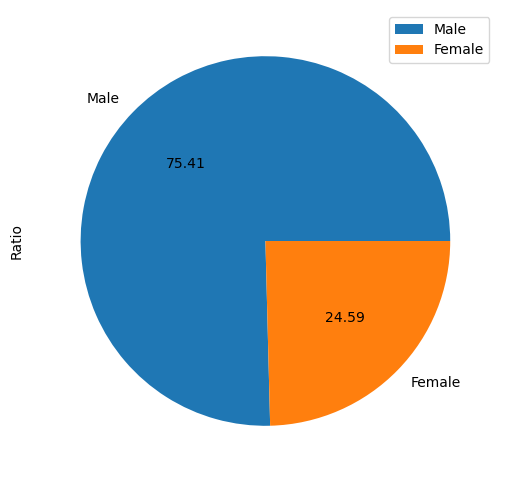

In [55]:
data.plot.pie(y= 'Ratio', autopct= '%.2f', figsize=(6,6))
data

### How much money they have spent (male and female).

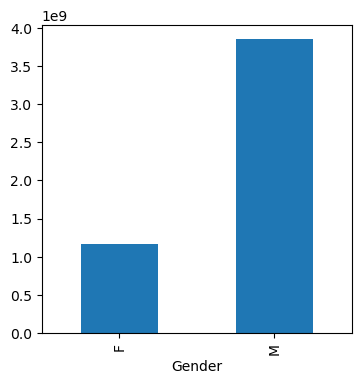

In [93]:
df.groupby('Gender').sum()['Purchase'].plot(kind='bar',figsize=(4,4))
plt.show()

### Average price of male and female that they are spending.

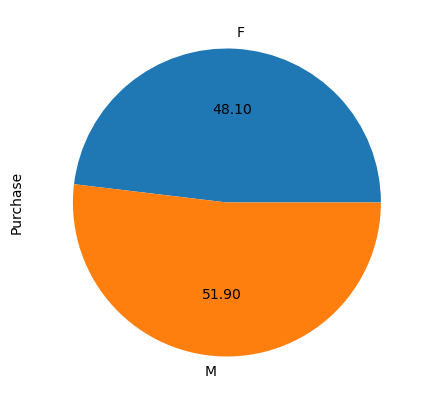

In [92]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie',figsize=(5,5), autopct= '%.2f')
plt.show()

# ANALYZING AGE & MARITAL STATUS

In [82]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,12.0,12.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,12.0,12.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,12.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,12.0,12.0,7969


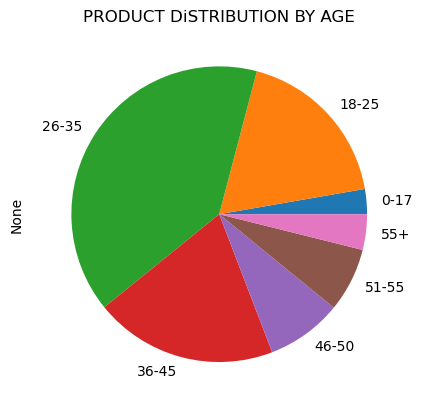

In [94]:
df.groupby('Age').size().plot(kind='pie',title= 'PRODUCT DiSTRIBUTION BY AGE')
plt.show()

In [98]:
for i in df['Age'].unique():
    print(i)

0-17
55+
26-35
46-50
51-55
36-45
18-25


In [99]:
df[df['Age']=='0-17']                                              # there are total 14707 products in the 0-17 age.

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,12.0,12.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,12.0,12.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,12.0,1057
85,1000019,P00112542,M,0-17,10,A,3,0,1,11.0,15.0,7746
...,...,...,...,...,...,...,...,...,...,...,...,...
537280,1004690,P00242742,F,0-17,10,C,3,0,1,2.0,9.0,11561
537281,1004690,P00226442,F,0-17,10,C,3,0,11,15.0,12.0,6010
537282,1004690,P00181442,F,0-17,10,C,3,0,11,12.0,12.0,7458
537283,1004690,P00192042,F,0-17,10,C,3,0,5,9.0,14.0,3706


In [105]:
for i in df['Age'].unique():
    print(i, ":", len(df[df['Age']==i]))                           # there are the total no. of purchases age wise.

0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


In [107]:
df[df['Age']==i]['Product_ID'].nunique() #age wise products id...

3213

In [119]:
for i in  df['Age'].unique():
    print(i, ':', df[df['Age']==i]['Product_ID'].nunique())         # different numbers of products id a/c to their age.

0-17 : 2300
55+ : 2573
26-35 : 3419
46-50 : 3099
51-55 : 2877
36-45 : 3318
18-25 : 3213


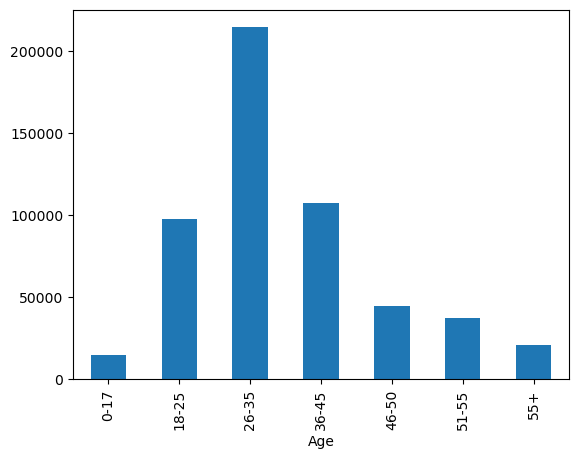

In [7]:
df.groupby('Age').size().plot(kind='bar')
plt.show()

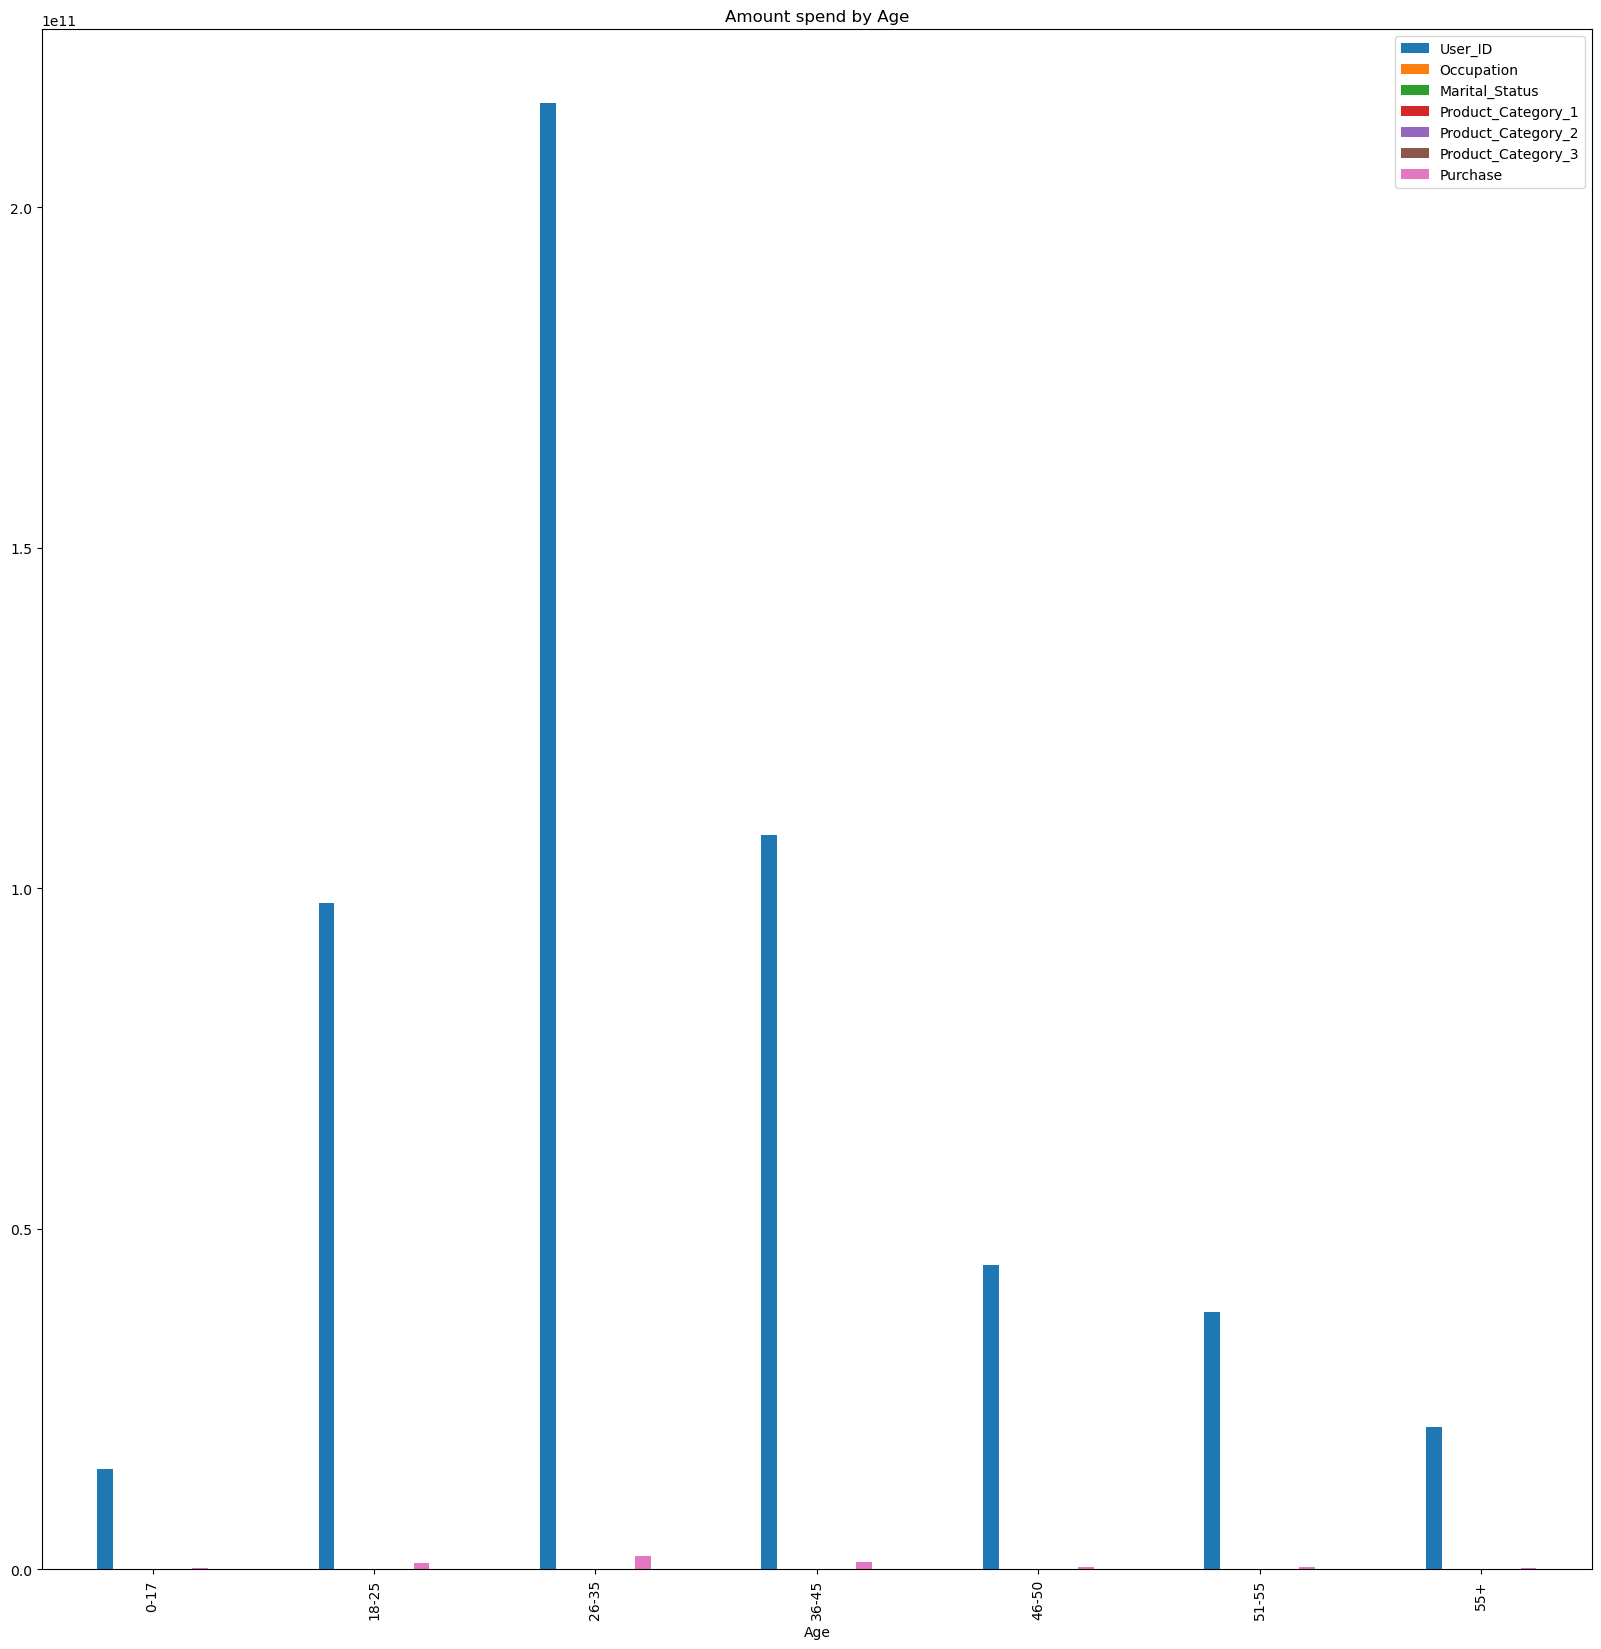

In [19]:
df.groupby('Age').sum().plot(kind='bar',
                             title='Amount spend by Age', figsize=(20,20))
plt.show()

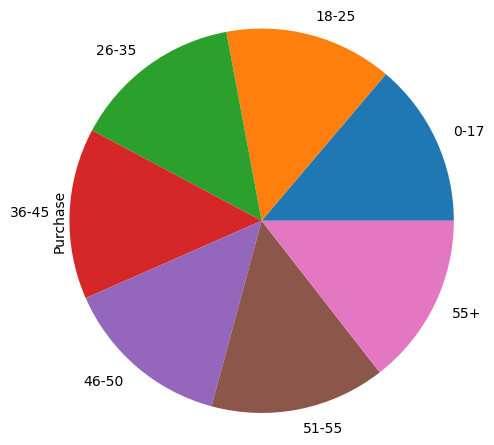

In [23]:
df.groupby('Age').mean()['Purchase'].plot(kind='pie', radius= 1.3)
plt.show()

### Marital status -- how many married & unmarried

<AxesSubplot:title={'center':'Marital Status'}, ylabel='None'>

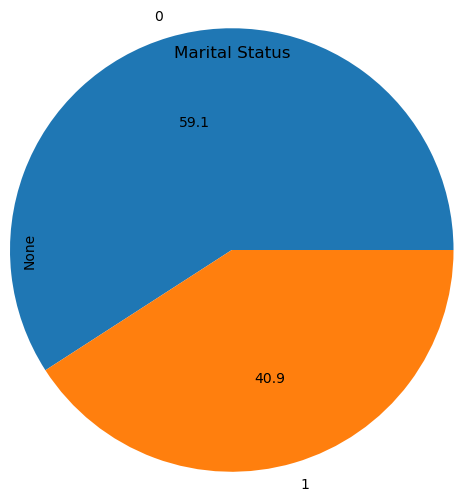

In [21]:
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%.1f', title= 'Marital Status', radius= 1.5)

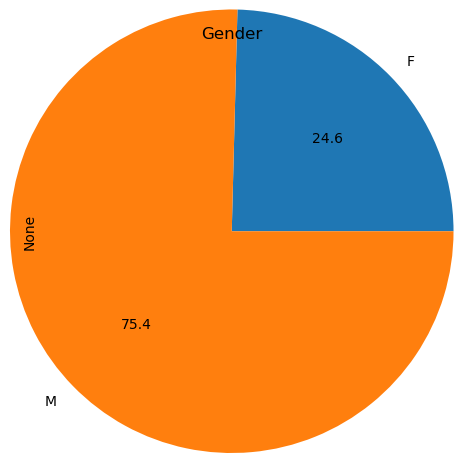

In [20]:
df.groupby('Gender').size().plot(kind='pie', autopct='%.1f', title= 'Gender', radius = 1.5)
plt.show()

## By comparing above, two genders and marital status we see that unmarried male are more.

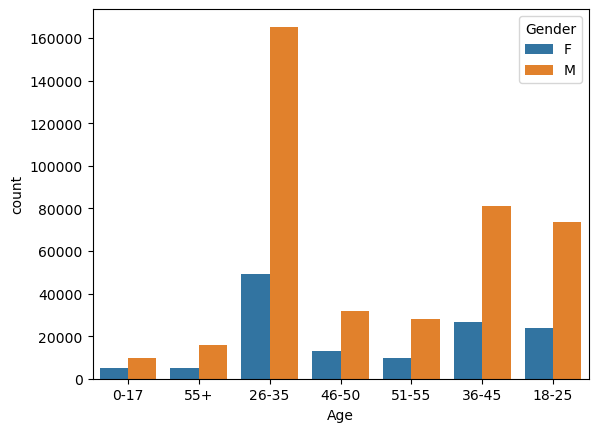

In [24]:
sns.countplot(x= 'Age', hue='Gender', data=df) # males are buying more age of 26-35
plt.show()

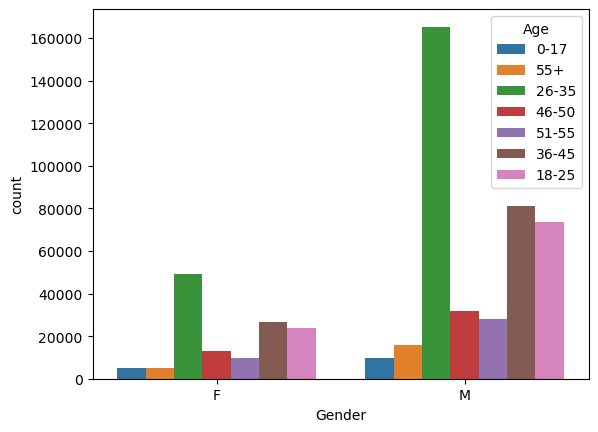

In [26]:
sns.countplot(x='Gender',hue='Age',data=df)
plt.show()

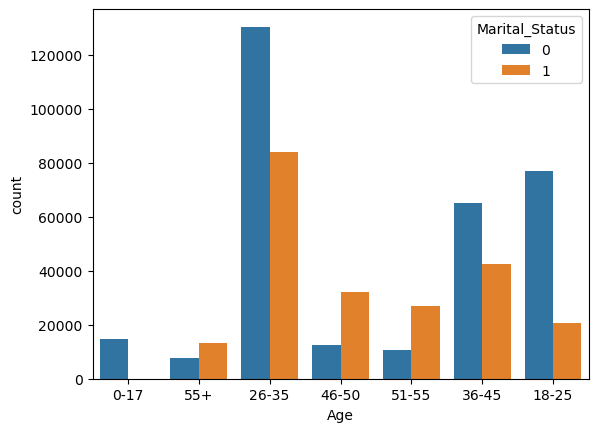

In [31]:
sns.countplot(x='Age', hue='Marital_Status', data=df)
plt.show()

In [33]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


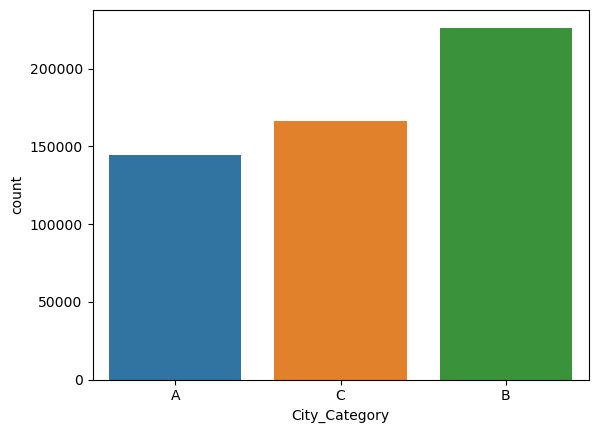

In [35]:
sns.countplot(x= 'City_Category',data= df)
plt.show()  # Three Categories shown here A,B,C

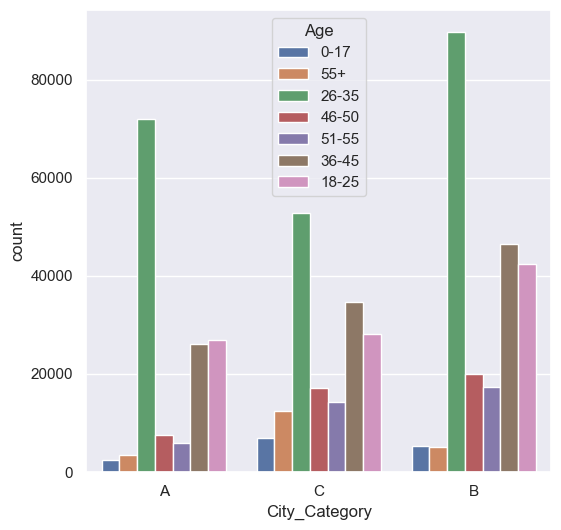

In [40]:
sns.set(rc={'figure.figsize': (6,6)})
sns.countplot(x= 'City_Category', hue='Age', data= df)
plt.show()                                                # here B city category having the more people age of 26-35.

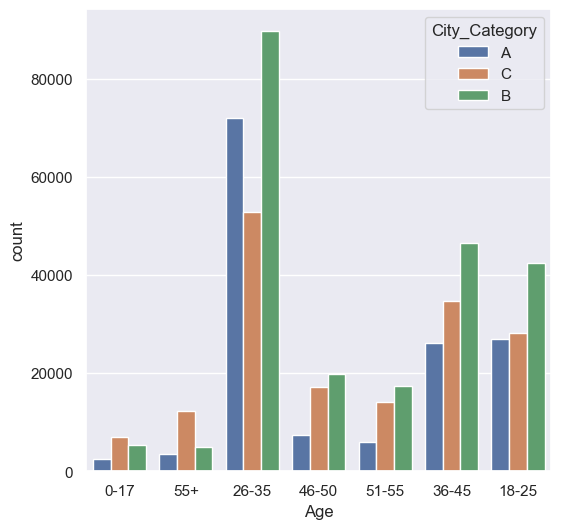

In [41]:
sns.countplot(x= 'Age', hue='City_Category',data= df)
plt.show()

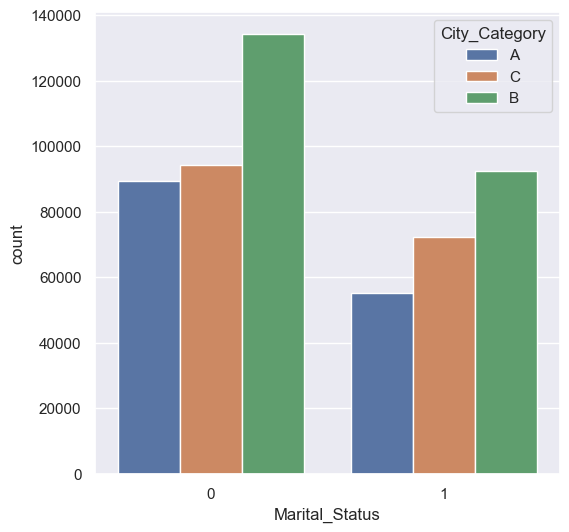

In [42]:
sns.countplot(x= 'Marital_Status', hue= 'City_Category', data= df)
plt.show()                                                           #here B category is having more umarried people

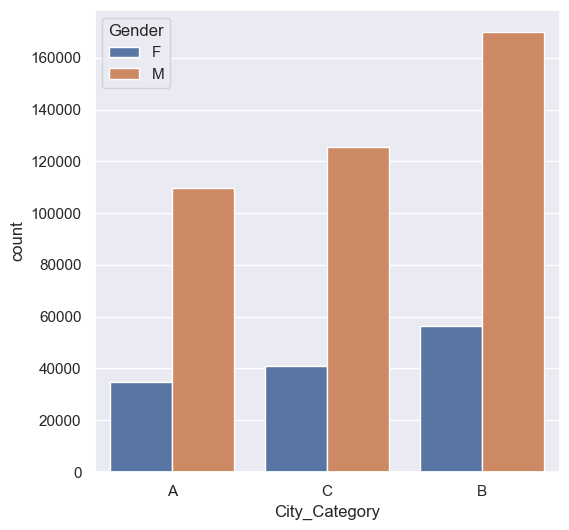

In [44]:
sns.countplot(x='City_Category', hue= 'Gender',data=df)
plt.show()                                                      #here B category is having more males.

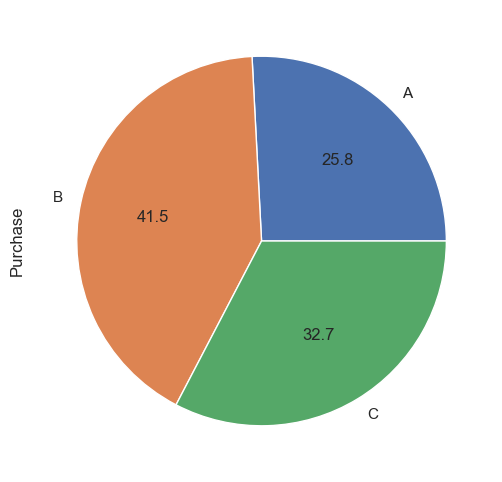

In [46]:
df.groupby('City_Category').sum()['Purchase'].plot(kind= 'pie', autopct= '%.1f')
plt.show()                                                   #here 'A' category people spending the least and 'B' the most

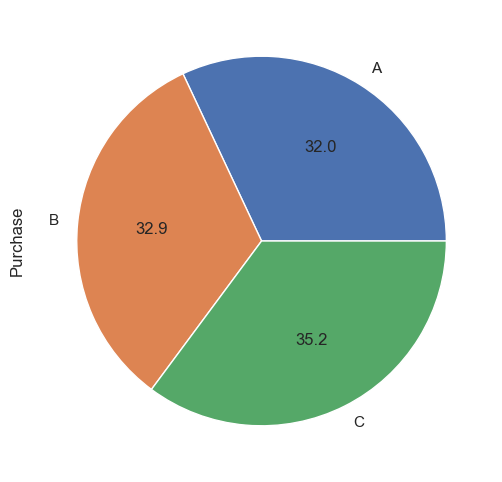

In [47]:
df.groupby('City_Category').mean()['Purchase'].plot(kind= 'pie', autopct= '%.1f')
plt.show()    #here 'A' category people is spending more in terms of avg with respect to above graph and 'B' category

### AS above discussed that in terms of total purchase group 'A' has the least spender..but in terms of average the 'A' almost spends as compared to 'B' as 'B' is the most spender who spends the most in terms of total purchasing.

### so by the sum() it seems that how much they are purchasing
### and by mean() how much they spending.

### so B have more no. of purchase but spending less.
### A have less purchase but spending more.

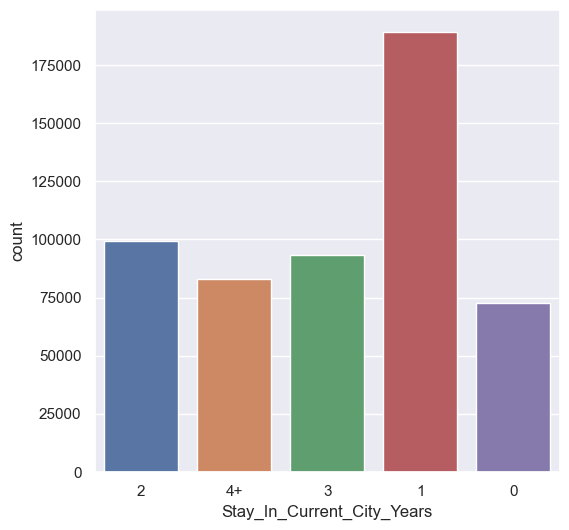

In [48]:
sns.countplot(x= 'Stay_In_Current_City_Years',data=df)
plt.show()                     #most no. of people who are buying from bfs is having around of 1 yrs of experience.

### Now we target the data like this--> people living atleast 1 yrs(bcz it is the max with respect to others) 
###                                                            then  male(male are more then female)
###                                                            and then unmarried(bcz unmarried are more then married)

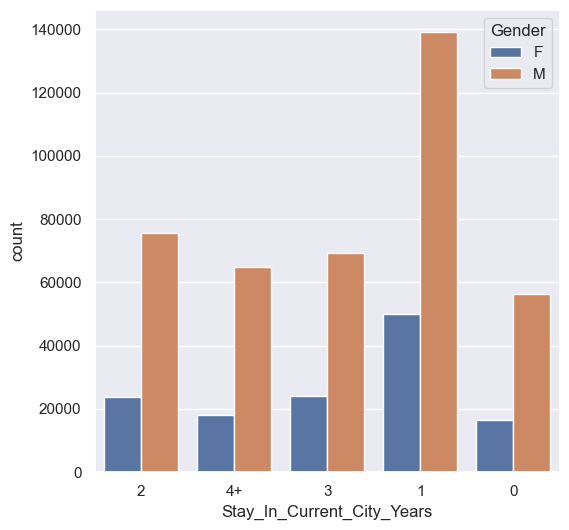

In [50]:
sns.countplot(x='Stay_In_Current_City_Years', hue= 'Gender',data=df)
plt.show()                                                  #here Males are more with 1 year of experience.

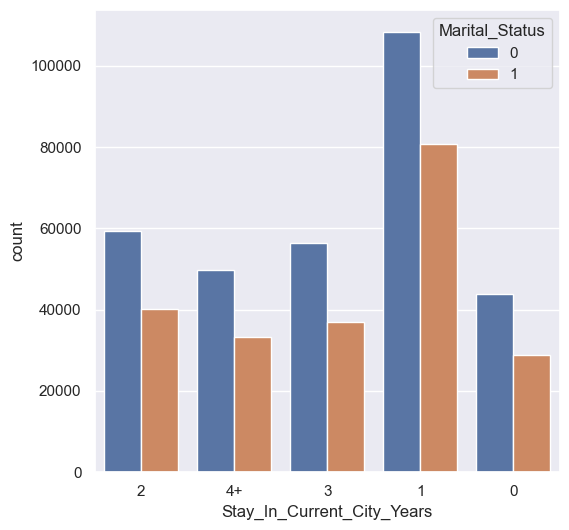

In [52]:
sns.countplot(x='Stay_In_Current_City_Years', hue='Marital_Status',data=df)
plt.show()                                        #here unmarried people are more with 1 year of experience.

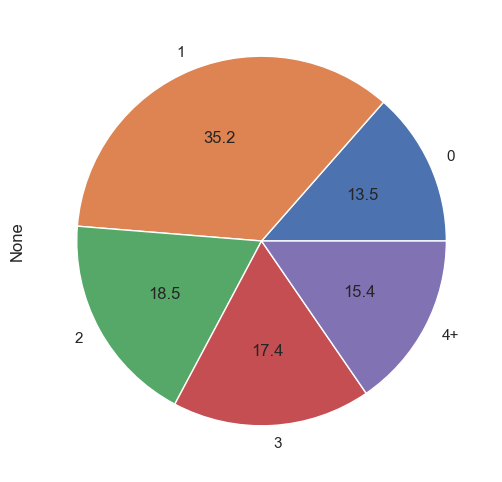

In [55]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie',autopct='%.1f')
plt.show()                                                          # it means 35% people live 1 year in a city.

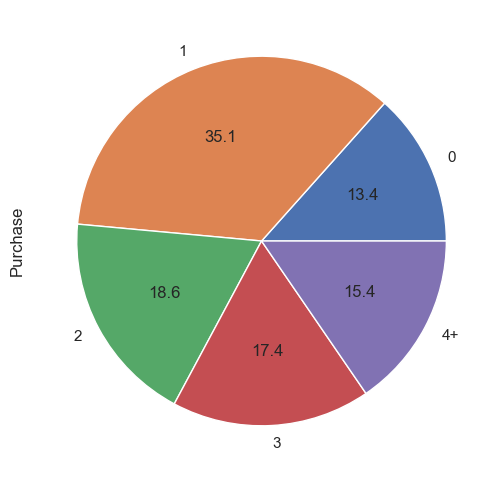

In [56]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='pie',autopct='%.1f')
plt.show()                     #now we compare this with purchase that how much money people are spending in the cities.

# OCCUPATION

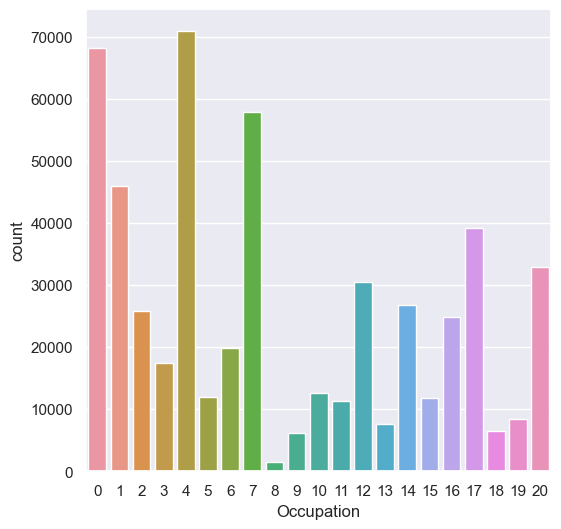

In [58]:
sns.countplot(x='Occupation', data=df)
plt.show()

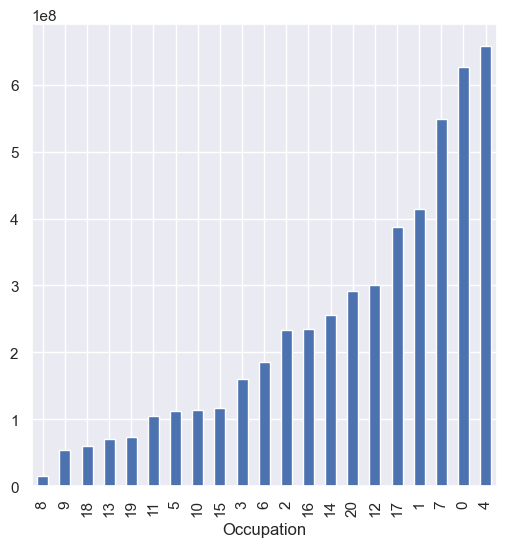

In [59]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')  
plt.show()                                  #here how much they are spending

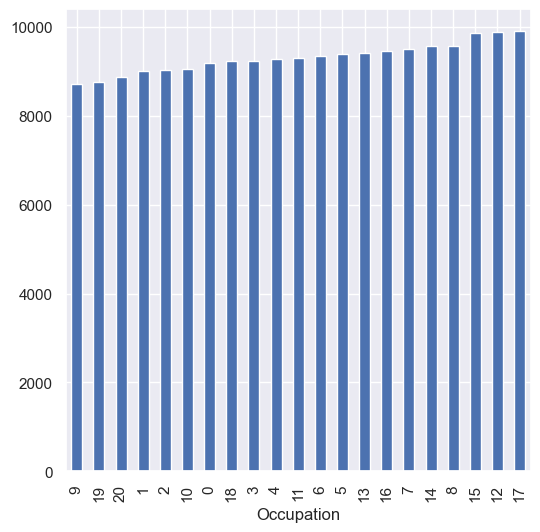

In [62]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind='bar')
plt.show()

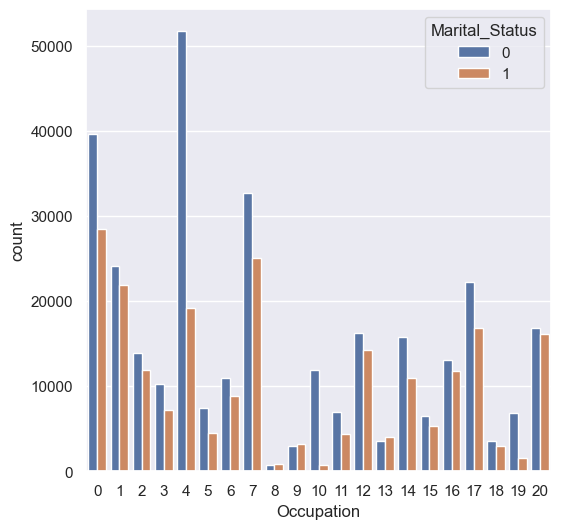

In [63]:
sns.countplot(x='Occupation', hue='Marital_Status',data=df)
plt.show()                         #here job occupation-4 having most unmarried people.

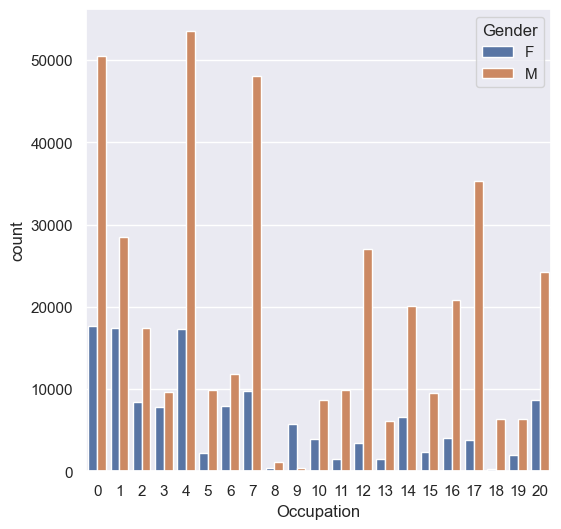

In [65]:
sns.countplot(x='Occupation',hue='Gender',data=df)
plt.show()                                  ## in occupation 9 females are more than males.

In [68]:
df.groupby('Occupation').nunique()['Product_ID'] # unique products people are buying from different occupations. ->> now plot this on graph.

Occupation
0     3243
1     3020
2     2892
3     2657
4     3174
5     2344
6     2724
7     3070
8     1026
9     1820
10    2110
11    2235
12    2664
13    1946
14    2680
15    2168
16    2863
17    2831
18    2047
19    2303
20    3147
Name: Product_ID, dtype: int64

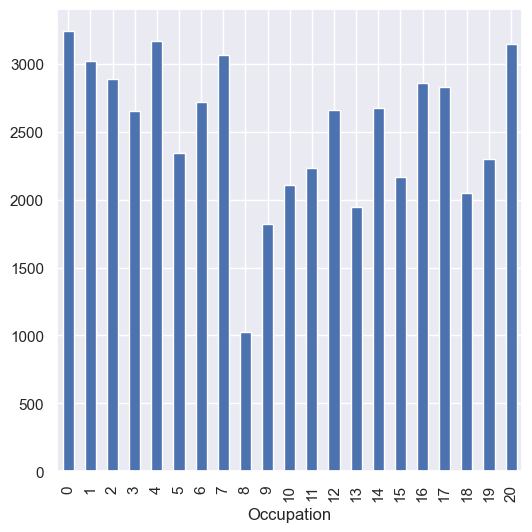

In [69]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind='bar')
plt.show()  #there are 3000+ unique products buying from the occupation 0,1,4,7 & 20.

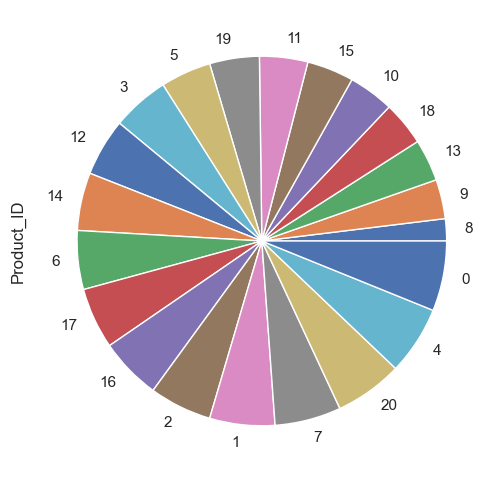

In [79]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='pie')
plt.show()                                                  #now we sort them so that it easy to analyze the max and min.

# PRODUCT CATEGORY

In [73]:
df.groupby('Product_Category_1').size()

Product_Category_1
1     138353
2      23499
3      19849
4      11567
5     148592
6      20164
7       3668
8     112132
9        404
10      5032
11     23960
12      3875
13      5440
14      1500
15      6203
16      9697
17       567
18      3075
dtype: int64

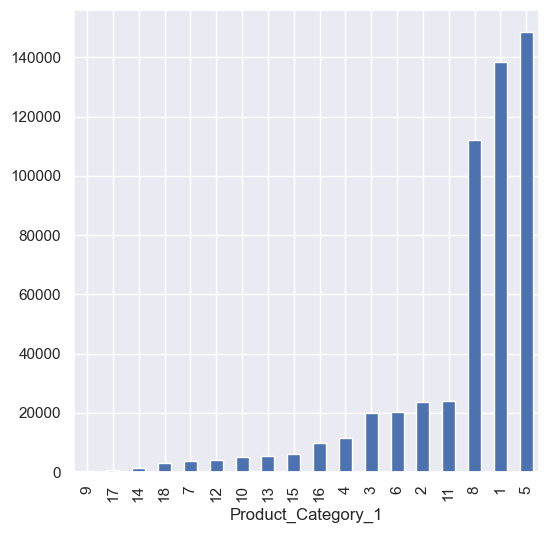

In [80]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')
plt.show()

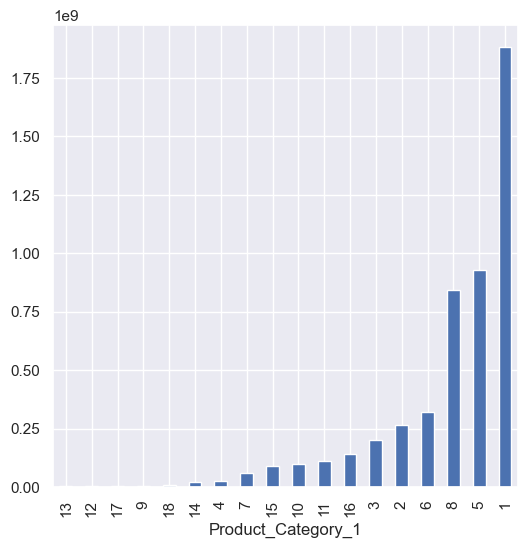

In [81]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')
plt.show()                            # we took purchase becz if we are having  price then we will find the sum.

### People purchase prod. 13 lot of times comparing with size() to sum().... in sum() people are not purchasing in 13
### but people have spent less money on it.. see on sum()
### but in average it is cheap. see on mean().

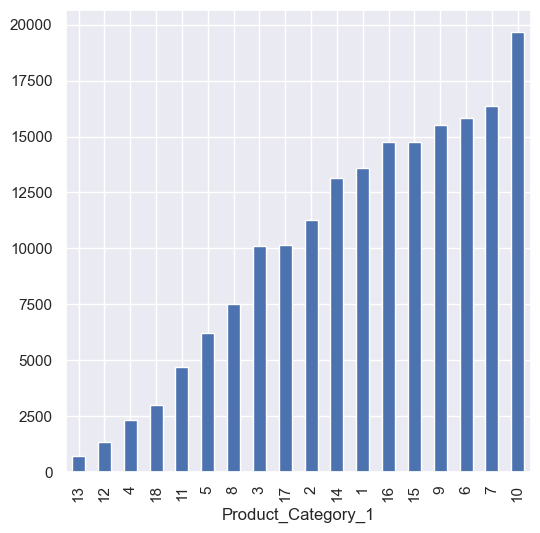

In [87]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind='bar')
plt.show()   #product catg. 10 purchased the more.

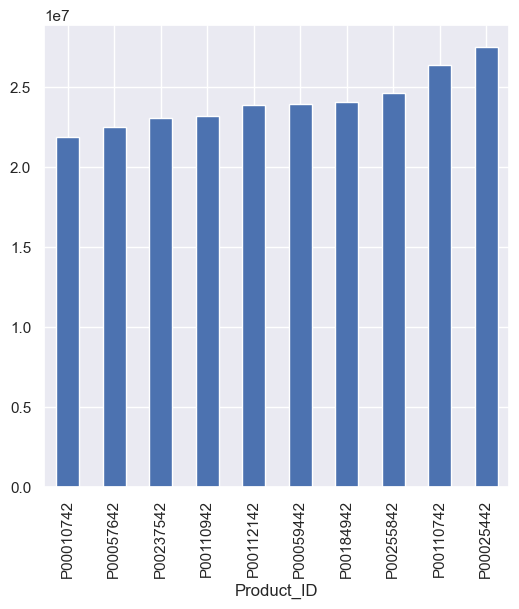

In [83]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind= 'bar') 
plt.show()     # in above we took the top 10 largest product id on the basis of purchasing and the 25442 is the one who spent the most.

# NOW WE ARE GOING TO COMBINE 2 THINGS-- 1)Gender
#                                      2)Marital Status
# AND MAKE ONE COLUMN NAMED AS --  MaritalGender' WITH WHICH WE ANALYZE THE OTHER COLUMNS.

In [92]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i]+"-"+str(df['Marital_Status'][i]))

In [93]:
l # male and females who are married and unmarried

['F-0',
 'F-0',
 'F-0',
 'F-0',
 'M-0',
 'M-0',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-1',
 'F-0',
 'F-0',
 'F-0',
 'M-0',
 'M-0',
 'M-1',
 'M-1',
 'M-1',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'F-1',
 'F-1',
 'M-0',
 'M-0',
 'M-0',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'F-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-0',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'M-1',
 'F-1',


In [96]:
df['MaritalGender'] = l #here we make a new column as MaritalGender.
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,F-0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F-0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,F-0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,F-0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,M-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664,M-0
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196,M-0
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043,M-0
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172,M-0


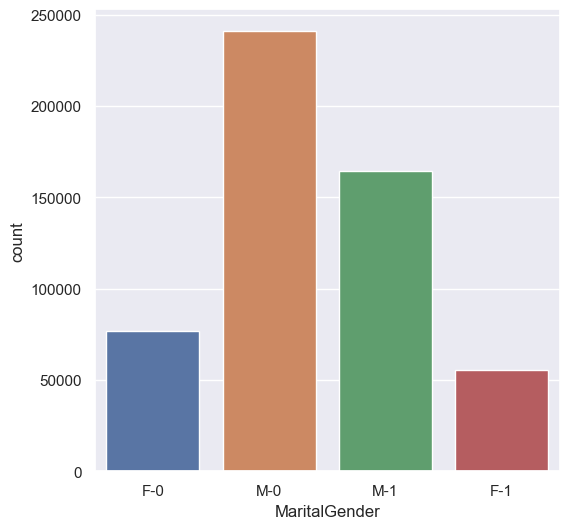

In [100]:
sns.countplot(x=df['MaritalGender'])
plt.show()    #here we get to know that how many Male & Femlaes, Married & Unmarried peoples are there.

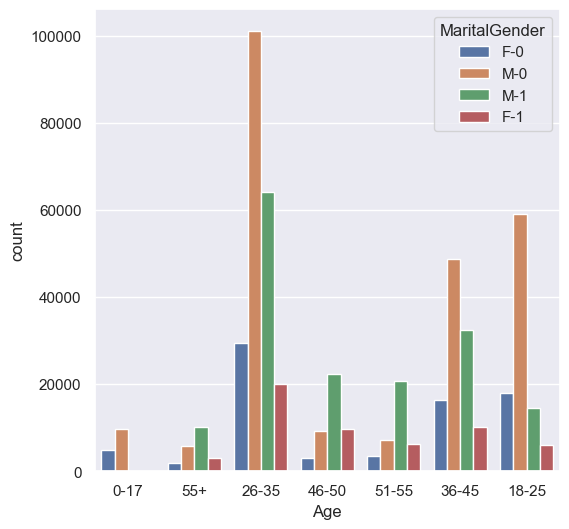

In [113]:
sns.countplot(x=df['Age'], hue=df['MaritalGender'])
plt.show()     #here unmarried male age of 26-35 are more.

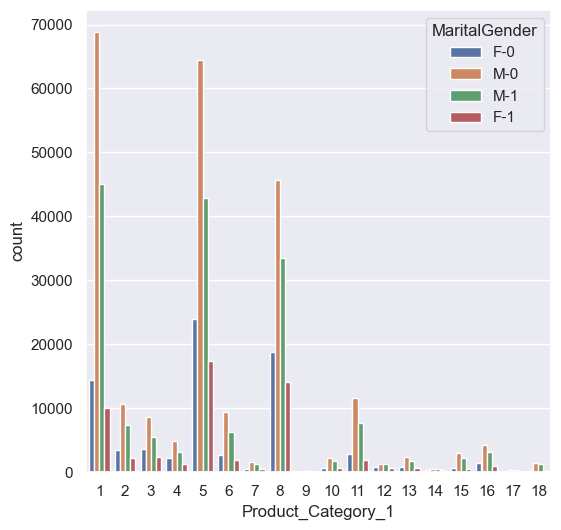

In [109]:
sns.countplot(x=df['Product_Category_1'], hue=df['MaritalGender'])
plt.show()               #here unmarried males are more with productcategory 1. and less ones are 14.

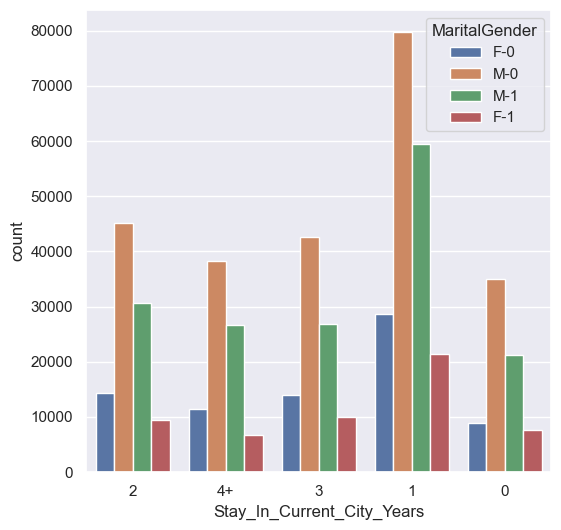

In [111]:
sns.countplot(x=df['Stay_In_Current_City_Years'], hue=df['MaritalGender'])
plt.show()              #here unmarried people are more living for 1 year.

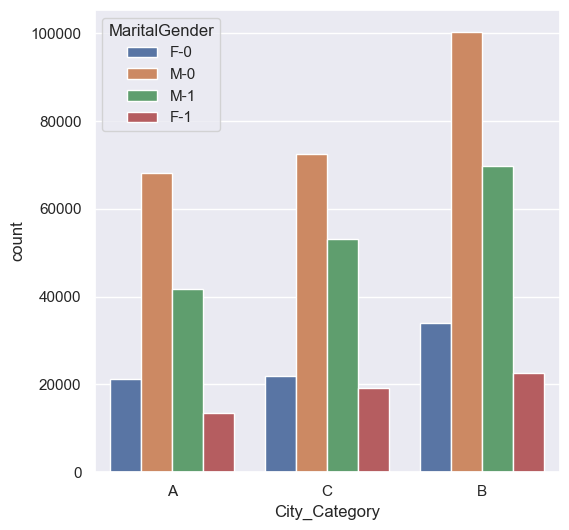

In [112]:
sns.countplot(x=df['City_Category'], hue=df['MaritalGender'])
plt.show()    #here married females are less with city category 'A'